In [1]:
#Using Transaction dataset, forecast the next day leads for each channel (Facebook, CRM and so on).
# SECOND CASE AND THIRD CASE were done here.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

import plotly.offline as py

import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [3]:
tran=pd.read_csv("C:/Users/Asus/Desktop/transactions.csv")

In [4]:
tran.head()

pk ga_transactionid  ga_datehour ga_products     ga_channels  \
0  146288072       2_50414543   2020082900   Product D        Facebook   
1  146288071       2_50414542   2020082900   Product D  Organic search   
2  146287503       2_50413935   2020082900   Product D  Organic search   
3  146287504       2_50413936   2020082900   Product D  Organic search   
4  146296436       3_65496155   2020082900   Product E      Google Ads   

   ga_itemquantity  
0                1  
1                1  
2                1  
3                1  
4                1

In [5]:
tran.isna().sum()

pk                        0
ga_transactionid          0
ga_datehour               0
ga_products               0
ga_channels         2071467
ga_itemquantity           0
dtype: int64

In [6]:
#ga_channels replace or drop?

In [7]:
count=0
for i in tran.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print(' it is ',round((count/len(tran.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  2071467
 it is  10 percent of the entire dataset the rows with missing values are excluded.


In [8]:
tran.dropna(axis=0,inplace=True)

In [9]:
tran.isna().sum()

pk                  0
ga_transactionid    0
ga_datehour         0
ga_products         0
ga_channels         0
ga_itemquantity     0
dtype: int64

In [10]:
#ı cleaned the na values by dropping them.I do not prefer to fiil cause it is categoric values.

In [11]:
#lets covert the time to datetime.

In [12]:
#lets make it sring.

In [13]:
tran['ga_datehour'] = tran['ga_datehour'].astype(str)

In [14]:
#seperating hour part and generating datetime column.

In [15]:
tran["datetime"]=tran["ga_datehour"].str[0:8]

In [16]:
tran["hour"]=tran["ga_datehour"].str[8:10]

In [17]:
tran.head()

pk ga_transactionid ga_datehour ga_products     ga_channels  \
0  146288072       2_50414543  2020082900   Product D        Facebook   
1  146288071       2_50414542  2020082900   Product D  Organic search   
2  146287503       2_50413935  2020082900   Product D  Organic search   
3  146287504       2_50413936  2020082900   Product D  Organic search   
4  146296436       3_65496155  2020082900   Product E      Google Ads   

   ga_itemquantity  datetime hour  
0                1  20200829   00  
1                1  20200829   00  
2                1  20200829   00  
3                1  20200829   00  
4                1  20200829   00

In [18]:
time=[]
tran=tran.reset_index(drop=True)
for i in tran.datetime:
    k=i[0:4]+"-"+i[4:6]+"-"+i[6:8]
    time.append(k)
df=pd.DataFrame({"date":time})
tran=tran.join(df)


In [19]:
tran.head()

pk ga_transactionid ga_datehour ga_products     ga_channels  \
0  146288072       2_50414543  2020082900   Product D        Facebook   
1  146288071       2_50414542  2020082900   Product D  Organic search   
2  146287503       2_50413935  2020082900   Product D  Organic search   
3  146287504       2_50413936  2020082900   Product D  Organic search   
4  146296436       3_65496155  2020082900   Product E      Google Ads   

   ga_itemquantity  datetime hour        date  
0                1  20200829   00  2020-08-29  
1                1  20200829   00  2020-08-29  
2                1  20200829   00  2020-08-29  
3                1  20200829   00  2020-08-29  
4                1  20200829   00  2020-08-29

In [20]:
tran["date"]=pd.to_datetime(tran["date"])

In [21]:
tran.drop(columns="datetime",inplace=True,axis=1)

In [22]:
tran.head()

pk ga_transactionid ga_datehour ga_products     ga_channels  \
0  146288072       2_50414543  2020082900   Product D        Facebook   
1  146288071       2_50414542  2020082900   Product D  Organic search   
2  146287503       2_50413935  2020082900   Product D  Organic search   
3  146287504       2_50413936  2020082900   Product D  Organic search   
4  146296436       3_65496155  2020082900   Product E      Google Ads   

   ga_itemquantity hour       date  
0                1   00 2020-08-29  
1                1   00 2020-08-29  
2                1   00 2020-08-29  
3                1   00 2020-08-29  
4                1   00 2020-08-29

In [23]:
final=tran[["date","ga_products","ga_channels","ga_itemquantity","hour"]]

In [24]:
final.head()

date ga_products     ga_channels  ga_itemquantity hour
0 2020-08-29   Product D        Facebook                1   00
1 2020-08-29   Product D  Organic search                1   00
2 2020-08-29   Product D  Organic search                1   00
3 2020-08-29   Product D  Organic search                1   00
4 2020-08-29   Product E      Google Ads                1   00

In [25]:
# we got the final data for future predictions.

In [26]:
#EXPLORATORY DATA ANALYSİS

In [27]:
#UNİVARITE ANALYSIS

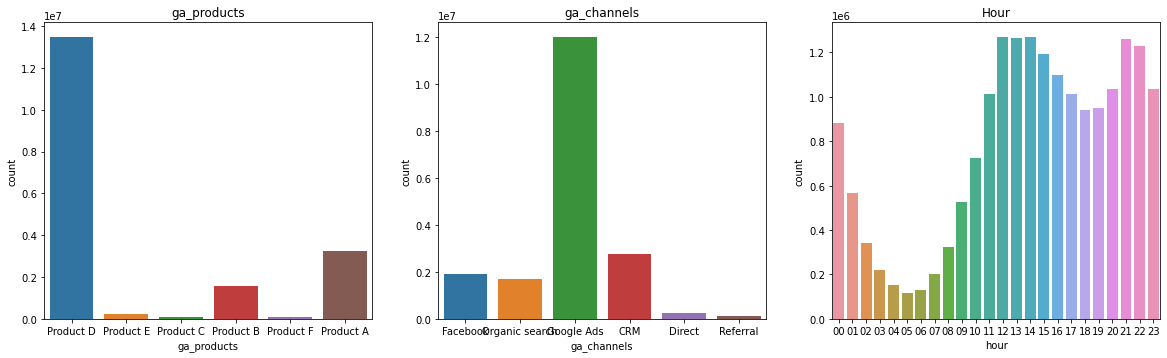

In [28]:
fig = plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
plt.title('ga_products')
sns.countplot(final.ga_products)



plt.subplot(2,3,2)
plt.title('ga_channels')
sns.countplot(final.ga_channels)



plt.subplot(2,3,3)
plt.title('Hour')
sns.countplot(final.hour)



plt.show()

In [29]:
# Here as you see, the product d is  the most visited product and people mostly visits via Google Ads.
#People mostly visits at between 12-14 and 21-22 hours.

In [30]:
# now ı want to groupby all final data by considering date. Cause ı want to daily predictions of the leads.

In [31]:
#But first ı should convert the categoric values to the numeric ones. Because all categoric values are more than two. 
#I will use one-hot encoding.

In [32]:
final=pd.get_dummies(final,columns=["ga_products"])

In [33]:
final=pd.get_dummies(final,columns=["ga_channels"])

In [34]:
final=pd.get_dummies(final,columns=["hour"])

In [35]:
final.head()

date  ga_itemquantity  ga_products_Product A  ga_products_Product B  \
0 2020-08-29                1                      0                      0   
1 2020-08-29                1                      0                      0   
2 2020-08-29                1                      0                      0   
3 2020-08-29                1                      0                      0   
4 2020-08-29                1                      0                      0   

   ga_products_Product C  ga_products_Product D  ga_products_Product E  \
0                      0                      1                      0   
1                      0                      1                      0   
2                      0                      1                      0   
3                      0                      1                      0   
4                      0                      0                      1   

   ga_products_Product F  ga_channels_CRM  ga_channels_Direct  ...  hour_14  \
0                      0                0                   0  ...        0   
1                      0                0                   0  ...        0   
2                      0                0                   0  ...        0   
3                      0                0                   0  ...        0   
4                      0                0                   0  ...        0   

   hour_15  hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   hour_23  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 38 columns]

In [36]:
final.ga_itemquantity.unique()

array([1, 2, 3, 4], dtype=int64)

In [37]:
final.columns

Index(['date', 'ga_itemquantity', 'ga_products_Product A',
       'ga_products_Product B', 'ga_products_Product C',
       'ga_products_Product D', 'ga_products_Product E',
       'ga_products_Product F', 'ga_channels_CRM', 'ga_channels_Direct',
       'ga_channels_Facebook', 'ga_channels_Google Ads',
       'ga_channels_Organic search', 'ga_channels_Referral', 'hour_00',
       'hour_01', 'hour_02', 'hour_03', 'hour_04', 'hour_05', 'hour_06',
       'hour_07', 'hour_08', 'hour_09', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

In [38]:
# ı want to do number of leads prediction, that's why ı multiply the one hot encoding columns with ga_itemquantity 
# when ı groupby with date, ı get the the number of leads for each channels.

In [39]:
#"ga_channels_CRM', 'ga_channels_Direct','ga_channels_Facebook', 'ga_channels_Google Ads','ga_channels_Organic search', 'ga_channels_Referral'

In [40]:
final["ga_channels_CRM_leads"]=final.ga_itemquantity*final.ga_channels_CRM

In [41]:
final["ga_channels_Direct_leads"]=final.ga_itemquantity*final.ga_channels_Direct

In [42]:
final["ga_channels_Facebook_leads"]=final.ga_itemquantity*final.ga_channels_Facebook

In [43]:
final["ga_channels_Google Ads_leads"]=final.ga_itemquantity*final["ga_channels_Google Ads"]

In [44]:
final["ga_channels_Organic search_leads"]=final.ga_itemquantity*final["ga_channels_Organic search"]

In [45]:
final["ga_channels_Referral_leads"]=final.ga_itemquantity*final["ga_channels_Referral"]

In [46]:
final=final.drop(columns=["ga_channels_CRM","ga_channels_Direct","ga_channels_Facebook","ga_channels_Google Ads","ga_channels_Organic search","ga_channels_Referral"],axis=1)

In [47]:
final=final.drop(columns=["ga_itemquantity"],axis=1)

In [48]:
final.head()

date  ga_products_Product A  ga_products_Product B  \
0 2020-08-29                      0                      0   
1 2020-08-29                      0                      0   
2 2020-08-29                      0                      0   
3 2020-08-29                      0                      0   
4 2020-08-29                      0                      0   

   ga_products_Product C  ga_products_Product D  ga_products_Product E  \
0                      0                      1                      0   
1                      0                      1                      0   
2                      0                      1                      0   
3                      0                      1                      0   
4                      0                      0                      1   

   ga_products_Product F  hour_00  hour_01  hour_02  ...  hour_20  hour_21  \
0                      0        1        0        0  ...        0        0   
1                      0        1        0        0  ...        0        0   
2                      0        1        0        0  ...        0        0   
3                      0        1        0        0  ...        0        0   
4                      0        1        0        0  ...        0        0   

   hour_22  hour_23  ga_channels_CRM_leads  ga_channels_Direct_leads  \
0        0        0                      0                         0   
1        0        0                      0                         0   
2        0        0                      0                         0   
3        0        0                      0                         0   
4        0        0                      0                         0   

   ga_channels_Facebook_leads  ga_channels_Google Ads_leads  \
0                           1                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             1   

   ga_channels_Organic search_leads  ga_channels_Referral_leads  
0                                 0                           0  
1                                 1                           0  
2                                 1                           0  
3                                 1                           0  
4                                 0                           0  

[5 rows x 37 columns]

In [49]:
#Now ı want to recheck if there are mising values.

In [50]:
final.isna().sum()

date                                0
ga_products_Product A               0
ga_products_Product B               0
ga_products_Product C               0
ga_products_Product D               0
ga_products_Product E               0
ga_products_Product F               0
hour_00                             0
hour_01                             0
hour_02                             0
hour_03                             0
hour_04                             0
hour_05                             0
hour_06                             0
hour_07                             0
hour_08                             0
hour_09                             0
hour_10                             0
hour_11                             0
hour_12                             0
hour_13                             0
hour_14                             0
hour_15                             0
hour_16                             0
hour_17                             0
hour_18                             0
hour_19     

In [51]:
#Now my all columns are numeric, ı want to groupby with date.

In [52]:
#data is so large.  I groupby required columns and then joined them to get 

In [53]:
fina=final[["date","ga_channels_CRM_leads","ga_channels_Direct_leads","ga_channels_Facebook_leads","ga_channels_Google Ads_leads","ga_channels_Organic search_leads","ga_channels_Referral_leads"]]

In [54]:
fina= fina.groupby(fina.date).sum()

In [55]:
fina.head()

ga_channels_CRM_leads  ga_channels_Direct_leads  \
date                                                          
2020-08-29                   2420                       337   
2020-08-30                   2611                       376   
2020-08-31                   3282                       500   
2020-09-01                  20859                       501   
2020-09-02                  11520                       550   

            ga_channels_Facebook_leads  ga_channels_Google Ads_leads  \
date                                                                   
2020-08-29                        2123                         21985   
2020-08-30                        2812                         24524   
2020-08-31                        2921                         33484   
2020-09-01                        2547                         32932   
2020-09-02                        3065                         30143   

            ga_channels_Organic search_leads  ga_channels_Referral_leads  
date                                                                      
2020-08-29                              4938                         389  
2020-08-30                              5878                         505  
2020-08-31                              7915                         580  
2020-09-01                              7588                         614  
2020-09-02                              6998                         616

In [56]:
fina1=final[final.columns[0:14]]

In [57]:
fina1= fina1.groupby(fina1.date).sum()

In [58]:
fina1.head()

ga_products_Product A  ga_products_Product B  \
date                                                       
2020-08-29                 4427.0                 2009.0   
2020-08-30                 4484.0                 2073.0   
2020-08-31                 5229.0                 3629.0   
2020-09-01                 6649.0                 3404.0   
2020-09-02                 6600.0                 3162.0   

            ga_products_Product C  ga_products_Product D  \
date                                                       
2020-08-29                  476.0                24222.0   
2020-08-30                  513.0                28232.0   
2020-08-31                  660.0                37520.0   
2020-09-01                  698.0                52896.0   
2020-09-02                  462.0                41451.0   

            ga_products_Product E  ga_products_Product F  hour_00  hour_01  \
date                                                                         
2020-08-29                  902.0                  143.0   1692.0   1175.0   
2020-08-30                 1184.0                  206.0   1602.0   1148.0   
2020-08-31                 1362.0                  252.0   2051.0   1425.0   
2020-09-01                 1050.0                  316.0   1892.0   1351.0   
2020-09-02                  898.0                  291.0   2274.0   1418.0   

            hour_02  hour_03  hour_04  hour_05  hour_06  
date                                                     
2020-08-29    636.0    406.0    299.0    209.0    208.0  
2020-08-30    738.0    429.0    252.0    192.0    196.0  
2020-08-31    796.0    459.0    307.0    232.0    265.0  
2020-09-01    328.0    463.0    311.0    252.0    267.0  
2020-09-02    843.0    496.0    284.0    250.0    316.0

In [59]:

fina2=final[["date","hour_07","hour_08","hour_09","hour_10","hour_11","hour_12","hour_13","hour_14","hour_15"]]

In [60]:
fina2= fina2.groupby(fina2.date).sum()

In [61]:
fina2.head()

hour_07  hour_08  hour_09  hour_10  hour_11  hour_12  hour_13  \
date                                                                        
2020-08-29    395.0    614.0    964.0   1305.0   1632.0   1798.0   1797.0   
2020-08-30    328.0    508.0    836.0   1211.0   1466.0   1823.0   1987.0   
2020-08-31    515.0    932.0   1655.0   2371.0   3326.0   3293.0   3193.0   
2020-09-01    530.0    975.0   1640.0   2158.0   7084.0   8892.0   4750.0   
2020-09-02    575.0    939.0   1577.0   2276.0   4009.0   5435.0   3585.0   

            hour_14  hour_15  
date                          
2020-08-29   1986.0   1854.0  
2020-08-30   2281.0   2248.0  
2020-08-31   3342.0   3280.0  
2020-09-01   5006.0   3807.0  
2020-09-02   3738.0   3046.0

In [62]:
fina3=final[["date","hour_16","hour_17","hour_18","hour_19","hour_20","hour_21","hour_22","hour_23"]]

In [63]:
fina3= fina3.groupby(fina3.date).sum()

In [64]:
fina3.head()

hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  \
date                                                                        
2020-08-29   1755.0   1710.0   1671.0   1528.0   1728.0   2437.0   2367.0   
2020-08-30   2204.0   2306.0   2084.0   1988.0   2133.0   3097.0   3103.0   
2020-08-31   3289.0   2972.0   2392.0   2182.0   2303.0   2697.0   2990.0   
2020-09-01   3366.0   2707.0   3882.0   2832.0   2878.0   3584.0   3357.0   
2020-09-02   2802.0   2726.0   2254.0   2168.0   2348.0   3564.0   3422.0   

            hour_23  
date                 
2020-08-29   2013.0  
2020-08-30   2532.0  
2020-08-31   2385.0  
2020-09-01   2701.0  
2020-09-02   2519.0

In [65]:
#Now ı want to join all of them.

In [66]:
final=fina.join(fina1,on="date")

In [67]:
final=final.join(fina2,on="date")

In [68]:
final=final.join(fina3,on="date")

In [69]:
final.head()

ga_channels_CRM_leads  ga_channels_Direct_leads  \
date                                                          
2020-08-29                   2420                       337   
2020-08-30                   2611                       376   
2020-08-31                   3282                       500   
2020-09-01                  20859                       501   
2020-09-02                  11520                       550   

            ga_channels_Facebook_leads  ga_channels_Google Ads_leads  \
date                                                                   
2020-08-29                        2123                         21985   
2020-08-30                        2812                         24524   
2020-08-31                        2921                         33484   
2020-09-01                        2547                         32932   
2020-09-02                        3065                         30143   

            ga_channels_Organic search_leads  ga_channels_Referral_leads  \
date                                                                       
2020-08-29                              4938                         389   
2020-08-30                              5878                         505   
2020-08-31                              7915                         580   
2020-09-01                              7588                         614   
2020-09-02                              6998                         616   

            ga_products_Product A  ga_products_Product B  \
date                                                       
2020-08-29                 4427.0                 2009.0   
2020-08-30                 4484.0                 2073.0   
2020-08-31                 5229.0                 3629.0   
2020-09-01                 6649.0                 3404.0   
2020-09-02                 6600.0                 3162.0   

            ga_products_Product C  ga_products_Product D  ...  hour_14  \
date                                                      ...            
2020-08-29                  476.0                24222.0  ...   1986.0   
2020-08-30                  513.0                28232.0  ...   2281.0   
2020-08-31                  660.0                37520.0  ...   3342.0   
2020-09-01                  698.0                52896.0  ...   5006.0   
2020-09-02                  462.0                41451.0  ...   3738.0   

            hour_15  hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  \
date                                                                        
2020-08-29   1854.0   1755.0   1710.0   1671.0   1528.0   1728.0   2437.0   
2020-08-30   2248.0   2204.0   2306.0   2084.0   1988.0   2133.0   3097.0   
2020-08-31   3280.0   3289.0   2972.0   2392.0   2182.0   2303.0   2697.0   
2020-09-01   3807.0   3366.0   2707.0   3882.0   2832.0   2878.0   3584.0   
2020-09-02   3046.0   2802.0   2726.0   2254.0   2168.0   2348.0   3564.0   

            hour_22  hour_23  
date                          
2020-08-29   2367.0   2013.0  
2020-08-30   3103.0   2532.0  
2020-08-31   2990.0   2385.0  
2020-09-01   3357.0   2701.0  
2020-09-02   3422.0   2519.0  

[5 rows x 36 columns]

In [70]:
# there are blanks between names of the ga_channels_Google and  ga_channels_Organic search_leads, it creates problem, 
#to overcome this, ı renamed them.

In [71]:
final.rename(columns={"ga_channels_Google Ads_leads": "ga_channels_Google_Ads_leads", "ga_channels_Organic search_leads": "ga_channels_Organic_search_leads"},inplace=True)

In [72]:
final.columns

Index(['ga_channels_CRM_leads', 'ga_channels_Direct_leads',
       'ga_channels_Facebook_leads', 'ga_channels_Google_Ads_leads',
       'ga_channels_Organic_search_leads', 'ga_channels_Referral_leads',
       'ga_products_Product A', 'ga_products_Product B',
       'ga_products_Product C', 'ga_products_Product D',
       'ga_products_Product E', 'ga_products_Product F', 'hour_00', 'hour_01',
       'hour_02', 'hour_03', 'hour_04', 'hour_05', 'hour_06', 'hour_07',
       'hour_08', 'hour_09', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

In [73]:
final.index

DatetimeIndex(['2020-08-29', '2020-08-30', '2020-08-31', '2020-09-01',
               '2020-09-02', '2020-09-03', '2020-09-04', '2020-09-05',
               '2020-09-06', '2020-09-07',
               ...
               '2021-10-09', '2021-10-10', '2021-10-11', '2021-10-12',
               '2021-10-13', '2021-10-14', '2021-10-15', '2021-10-16',
               '2021-10-17', '2021-10-18'],
              dtype='datetime64[ns]', name='date', length=416, freq=None)

In [74]:
finall=final.copy()

In [75]:
#now ı want to apply time series to my data. ı did one hot encoding to hour and products. However, ı did not used this columns cause ı decided to use prophet.

In [76]:
#PROPHET FOR PREDİCTİON

In [77]:
#predicting for CRM CAHNNEL#

In [78]:
finall=finall[finall.columns[0:1]]

In [79]:
finall.head(3)

ga_channels_CRM_leads
date                             
2020-08-29                   2420
2020-08-30                   2611
2020-08-31                   3282

In [80]:
prophet= finall
prophet
pr_data = prophet.reset_index()
pr_data.columns = ['ds','y']
pr_data



ds      y
0   2020-08-29   2420
1   2020-08-30   2611
2   2020-08-31   3282
3   2020-09-01  20859
4   2020-09-02  11520
..         ...    ...
411 2021-10-14   2848
412 2021-10-15   3953
413 2021-10-16   1318
414 2021-10-17   1953
415 2021-10-18    185

[416 rows x 2 columns]

In [81]:
m=Prophet(yearly_seasonality=True ,daily_seasonality=True)

In [82]:
m.fit(pr_data)

In [83]:
future=m.make_future_dataframe(periods=1)
forecast=m.predict(future)
forecast


ds        trend   yhat_lower    yhat_upper  trend_lower  \
0   2020-08-29  3805.907158  1353.600532   9105.877286  3805.907158   
1   2020-08-30  3792.814243  1580.073403   9916.812778  3792.814243   
2   2020-08-31  3779.721329  7223.839118  15061.793584  3779.721329   
3   2020-09-01  3766.628414  7087.006487  14765.753330  3766.628414   
4   2020-09-02  3753.535499  6068.634155  14202.979911  3753.535499   
..         ...          ...          ...           ...          ...   
412 2021-10-15 -1588.374036 -1209.897522   6850.153986 -1588.374036   
413 2021-10-16 -1601.466950 -3199.008023   4647.214833 -1601.466950   
414 2021-10-17 -1614.559863 -2741.154048   5334.086682 -1614.559863   
415 2021-10-18 -1627.652776  2419.539192  10319.395255 -1627.652776   
416 2021-10-19 -1640.745690  2425.889665  10576.837007 -1640.745690   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    3805.907158     1287.538943           1287.538943           1287.538943   
1    3792.814243     1908.065730           1908.065730           1908.065730   
2    3779.721329     7191.774578           7191.774578           7191.774578   
3    3766.628414     7078.151877           7078.151877           7078.151877   
4    3753.535499     6380.785839           6380.785839           6380.785839   
..           ...             ...                   ...                   ...   
412 -1588.374036     4420.939907           4420.939907           4420.939907   
413 -1601.466950     2240.842943           2240.842943           2240.842943   
414 -1614.559863     2858.526840           2858.526840           2858.526840   
415 -1627.652776     8137.249209           8137.249209           8137.249209   
416 -1640.745690     8015.464608           8015.464608           8015.464608   

         daily  ...       weekly  weekly_lower  weekly_upper      yearly  \
0    5550.3976  ... -3395.676907  -3395.676907  -3395.676907 -867.181750   
1    5550.3976  ... -2815.423373  -2815.423373  -2815.423373 -826.908497   
2    5550.3976  ...  2428.483389   2428.483389   2428.483389 -787.106410   
3    5550.3976  ...  2275.482848   2275.482848   2275.482848 -747.728572   
4    5550.3976  ...  1539.132663   1539.132663   1539.132663 -708.744424   
..         ...  ...          ...           ...           ...         ...   
412  5550.3976  ... -1176.535206  -1176.535206  -1176.535206   47.077513   
413  5550.3976  ... -3395.676907  -3395.676907  -3395.676907   86.122249   
414  5550.3976  ... -2815.423373  -2815.423373  -2815.423373  123.552613   
415  5550.3976  ...  2428.483389   2428.483389   2428.483389  158.368220   
416  5550.3976  ...  2275.482848   2275.482848   2275.482848  189.584160   

     yearly_lower  yearly_upper  multiplicative_terms  \
0     -867.181750   -867.181750                   0.0   
1     -826.908497   -826.908497                   0.0   
2     -787.106410   -787.106410                   0.0   
3     -747.728572   -747.728572                   0.0   
4     -708.744424   -708.744424                   0.0   
..            ...           ...                   ...   
412     47.077513     47.077513                   0.0   
413     86.122249     86.122249                   0.0   
414    123.552613    123.552613                   0.0   
415    158.368220    158.368220                   0.0   
416    189.584160    189.584160                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0   5093.446101  
1                           0.0                         0.0   5700.879973  
2                           0.0                         0.0  10971.495907  
3                           0.0                         0.0  10844.780291  
4                           0.0                         0.0  10134.321338  
..                          ...                         ...           ...  
412                         0.0                         0.0   2832.5

In [84]:
next_day_leads_CRM=forecast.yhat[416]

In [85]:
print("2021-10-19:",next_day_leads_CRM)

2021-10-19: 6374.7189182988095


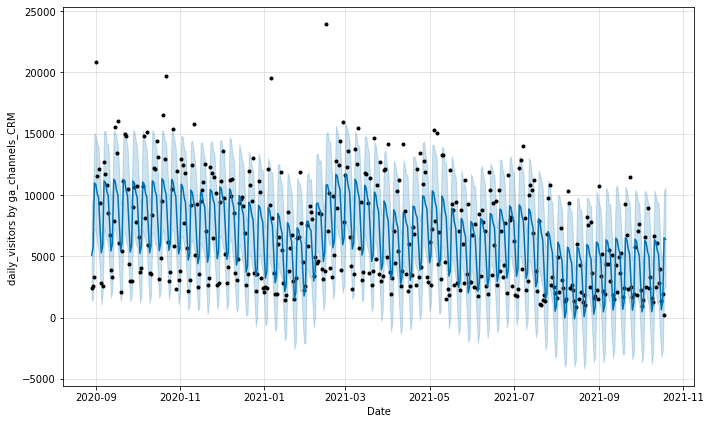

In [86]:
fig = plot_plotly(m, forecast)
py.iplot(fig) 

fig = m.plot(forecast,xlabel='Date',ylabel='daily_visitors by ga_channels_CRM ')


In [87]:
#predicting for DIRECT#

In [88]:
finalc=final.copy()

In [89]:
finall=finalc["ga_channels_Direct_leads"]

In [90]:
prophet= finall
prophet
pr_data = prophet.reset_index()
pr_data.columns = ['ds','y']
pr_data

ds    y
0   2020-08-29  337
1   2020-08-30  376
2   2020-08-31  500
3   2020-09-01  501
4   2020-09-02  550
..         ...  ...
411 2021-10-14  747
412 2021-10-15  722
413 2021-10-16  493
414 2021-10-17  599
415 2021-10-18   81

[416 rows x 2 columns]

In [91]:
m=Prophet(yearly_seasonality=True ,daily_seasonality=True)

In [92]:
m.fit(pr_data)

In [93]:
future=m.make_future_dataframe(periods=1)
forecast=m.predict(future)
forecast

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2020-08-29  353.406710   50.689522  470.705298   353.406710   353.406710   
1   2020-08-30  353.871190  161.205988  536.578290   353.871190   353.871190   
2   2020-08-31  354.335670  204.831276  614.913345   354.335670   354.335670   
3   2020-09-01  354.800150  172.995916  556.497602   354.800150   354.800150   
4   2020-09-02  355.264630  167.115260  576.939968   355.264630   355.264630   
..         ...         ...         ...         ...          ...          ...   
412 2021-10-15  660.799367  400.881692  807.376262   660.799367   660.799367   
413 2021-10-16  661.569341  307.154096  715.748064   661.569341   661.569341   
414 2021-10-17  662.339315  397.510528  808.004727   662.339315   662.339315   
415 2021-10-18  663.109289  453.201544  876.284712   663.109289   663.109289   
416 2021-10-19  663.879262  407.043982  814.450240   663.879262   663.879262   

     additive_terms  additive_terms_lower  additive_terms_upper      daily  \
0       -101.205990           -101.205990           -101.205990  66.437822   
1        -12.899364            -12.899364            -12.899364  66.437822   
2         57.645479             57.645479             57.645479  66.437822   
3          9.950962              9.950962              9.950962  66.437822   
4         17.385426             17.385426             17.385426  66.437822   
..              ...                   ...                   ...        ...   
412      -62.545796            -62.545796            -62.545796  66.437822   
413     -141.373444           -141.373444           -141.373444  66.437822   
414      -58.128235            -58.128235            -58.128235  66.437822   
415        8.371639              8.371639              8.371639  66.437822   
416      -42.471545            -42.471545            -42.471545  66.437822   

     ...      weekly  weekly_lower  weekly_upper      yearly  yearly_lower  \
0    ... -105.298200   -105.298200   -105.298200  -62.345612    -62.345612   
1    ...  -13.318762    -13.318762    -13.318762  -66.018424    -66.018424   
2    ...   60.084304     60.084304     60.084304  -68.876647    -68.876647   
3    ...   14.269421     14.269421     14.269421  -70.756280    -70.756280   
4    ...   22.457043     22.457043     22.457043  -71.509439    -71.509439   
..   ...         ...           ...           ...         ...           ...   
412  ...  -36.950776    -36.950776    -36.950776  -92.032841    -92.032841   
413  ... -105.298200   -105.298200   -105.298200 -102.513065   -102.513065   
414  ...  -13.318762    -13.318762    -13.318762 -111.247295   -111.247295   
415  ...   60.084304     60.084304     60.084304 -118.150487   -118.150487   
416  ...   14.269421     14.269421     14.269421 -123.178788   -123.178788   

     yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0      -62.345612                   0.0                         0.0   
1      -66.018424                   0.0                         0.0   
2      -68.876647                   0.0                         0.0   
3      -70.756280                   0.0                         0.0   
4      -71.509439                   0.0                         0.0   
..            ...                   ...                         ...   
412    -92.032841                   0.0                         0.0   
413   -102.513065                   0.0                         0.0   
414   -111.247295                   0.0                         0.0   
415   -118.150487                   0.0                         0.0   
416   -123.178788                   0.0                         0.0   

     multiplicative_terms_upper        yhat  
0                           0.0  252.200720  
1                           0.0  340.971826  
2                           0.0  411.981149  
3                           0.0  364.751113  
4                           0.0  372.650056  
..                          ...         ...  
41

In [94]:
next_day_leads_Direct=forecast.yhat[416]

In [95]:
print("2021-10-19:",next_day_leads_Direct)

2021-10-19: 621.4077167676692


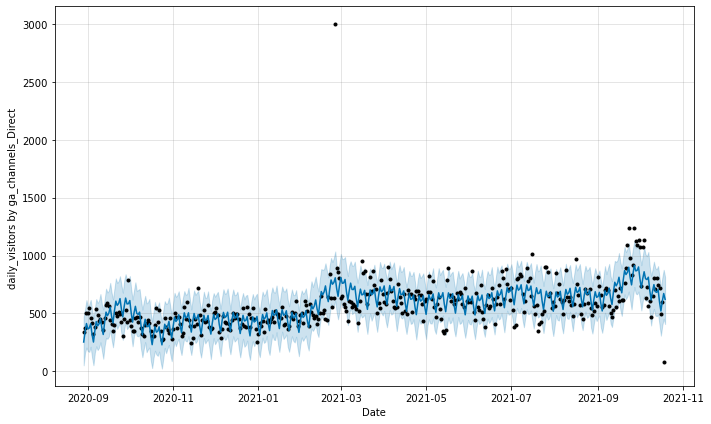

In [96]:
fig = plot_plotly(m, forecast)
py.iplot(fig) 

fig = m.plot(forecast,xlabel='Date',ylabel='daily_visitors by ga_channels_Direct ')

In [97]:
#predicting for FACEBOOK#

In [98]:
finall=finalc["ga_channels_Facebook_leads"]

In [99]:
prophet= finall
prophet
pr_data = prophet.reset_index()
pr_data.columns = ['ds','y']
pr_data

ds     y
0   2020-08-29  2123
1   2020-08-30  2812
2   2020-08-31  2921
3   2020-09-01  2547
4   2020-09-02  3065
..         ...   ...
411 2021-10-14  4930
412 2021-10-15  4327
413 2021-10-16  4291
414 2021-10-17  6520
415 2021-10-18  1096

[416 rows x 2 columns]

In [100]:
m=Prophet(yearly_seasonality=True ,daily_seasonality=True)

In [101]:
m.fit(pr_data)

In [102]:
future=m.make_future_dataframe(periods=1)
forecast=m.predict(future)
forecast

ds        trend   yhat_lower   yhat_upper  trend_lower  \
0   2020-08-29  2479.122565  1290.920560  4952.578666  2479.122565   
1   2020-08-30  2482.914687  2411.841181  5961.944836  2482.914687   
2   2020-08-31  2486.706808  1884.667296  5616.794145  2486.706808   
3   2020-09-01  2490.498930  1260.150130  4908.791792  2490.498930   
4   2020-09-02  2494.291051  1489.402811  4985.059318  2494.291051   
..         ...          ...          ...          ...          ...   
412 2021-10-15  4217.218997  2067.856791  5775.943816  4217.218997   
413 2021-10-16  4221.451664  1951.505782  5784.606602  4221.451664   
414 2021-10-17  4225.684332  3130.764565  6806.506161  4225.684332   
415 2021-10-18  4229.916999  2555.125276  6319.029909  4229.916999   
416 2021-10-19  4234.149666  2144.709754  5713.696760  4234.149666   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    2479.122565      628.113544            628.113544            628.113544   
1    2482.914687     1690.094959           1690.094959           1690.094959   
2    2486.706808     1233.270322           1233.270322           1233.270322   
3    2490.498930      698.676068            698.676068            698.676068   
4    2494.291051      708.894850            708.894850            708.894850   
..           ...             ...                   ...                   ...   
412  4217.218997     -258.461381           -258.461381           -258.461381   
413  4221.451664     -391.949543           -391.949543           -391.949543   
414  4225.684332      649.186458            649.186458            649.186458   
415  4229.916999      188.476144            188.476144            188.476144   
416  4234.149666     -333.573654           -333.573654           -333.573654   

           daily  ...      weekly  weekly_lower  weekly_upper       yearly  \
0    1429.384772  ... -340.560028   -340.560028   -340.560028  -460.711201   
1    1429.384772  ...  729.335373    729.335373    729.335373  -468.625187   
2    1429.384772  ...  293.220412    293.220412    293.220412  -489.334862   
3    1429.384772  ... -208.703770   -208.703770   -208.703770  -522.004934   
4    1429.384772  ... -155.012801   -155.012801   -155.012801  -565.477121   
..           ...  ...         ...           ...           ...          ...   
412  1429.384772  ... -239.502094   -239.502094   -239.502094 -1448.344059   
413  1429.384772  ... -340.560028   -340.560028   -340.560028 -1480.774288   
414  1429.384772  ...  729.335373    729.335373    729.335373 -1509.533688   
415  1429.384772  ...  293.220412    293.220412    293.220412 -1534.129040   
416  1429.384772  ... -208.703770   -208.703770   -208.703770 -1554.254656   

     yearly_lower  yearly_upper  multiplicative_terms  \
0     -460.711201   -460.711201                   0.0   
1     -468.625187   -468.625187                   0.0   
2     -489.334862   -489.334862                   0.0   
3     -522.004934   -522.004934                   0.0   
4     -565.477121   -565.477121                   0.0   
..            ...           ...                   ...   
412  -1448.344059  -1448.344059                   0.0   
413  -1480.774288  -1480.774288                   0.0   
414  -1509.533688  -1509.533688                   0.0   
415  -1534.129040  -1534.129040                   0.0   
416  -1554.254656  -1554.254656                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper         yhat  
0                           0.0                         0.0  3107.236109  
1                           0.0                         0.0  4173.009645  
2                           0.0                         0.0  3719.977130  
3                           0.0                         0.0  3189.174998  
4                           0.0                         0.0  3203.185901  
..                          ...                         ...          ...  
412                         0.0                         0.0  39

In [103]:
next_day_leads_Facebook=forecast.yhat[416]

In [104]:
print("2021-10-19:",next_day_leads_Facebook)

2021-10-19: 3900.5760127279805


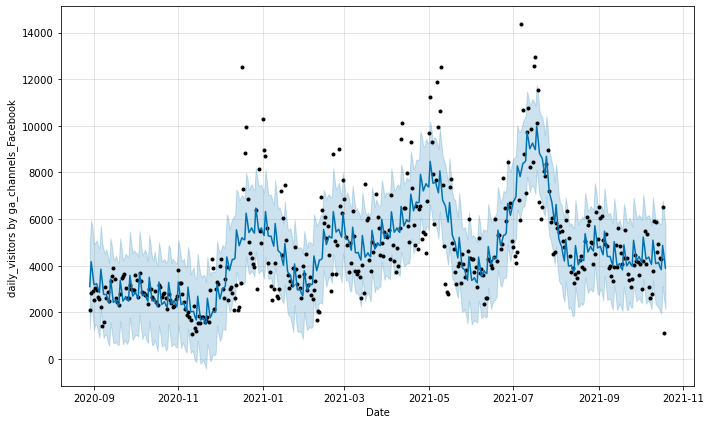

In [105]:
fig = plot_plotly(m, forecast)
py.iplot(fig) 

fig = m.plot(forecast,xlabel='Date',ylabel='daily_visitors by ga_channels_Facebook ')

In [106]:
#predicting for GOOGLE ADS#

In [107]:
finall=finalc["ga_channels_Google_Ads_leads"]

In [108]:
prophet= finall
prophet
pr_data = prophet.reset_index()
pr_data.columns = ['ds','y']
pr_data

ds      y
0   2020-08-29  21985
1   2020-08-30  24524
2   2020-08-31  33484
3   2020-09-01  32932
4   2020-09-02  30143
..         ...    ...
411 2021-10-14  34627
412 2021-10-15  32897
413 2021-10-16  21555
414 2021-10-17  29707
415 2021-10-18   4783

[416 rows x 2 columns]

In [109]:
m=Prophet(yearly_seasonality=True ,daily_seasonality=True)

In [110]:
m.fit(pr_data)

In [111]:
future=m.make_future_dataframe(periods=1)
forecast=m.predict(future)
forecast

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2020-08-29  23627.264731  20702.593634  28705.504171  23627.264731   
1   2020-08-30  23620.033752  23617.167251  31457.547865  23620.033752   
2   2020-08-31  23612.802772  28924.510259  37293.008532  23612.802772   
3   2020-09-01  23605.571793  27293.676756  35633.803320  23605.571793   
4   2020-09-02  23598.340813  27134.625105  35015.571539  23598.340813   
..         ...           ...           ...           ...           ...   
412 2021-10-15  20648.099963  22227.597507  30786.061850  20648.099963   
413 2021-10-16  20640.868979  17985.480334  26116.033435  20640.868979   
414 2021-10-17  20633.637994  20692.232587  28951.849513  20633.637994   
415 2021-10-18  20626.407010  25809.936695  34243.578311  20626.407010   
416 2021-10-19  20619.176026  24195.374976  32313.162296  20619.176026   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    23627.264731      821.891326            821.891326            821.891326   
1    23620.033752     3858.337135           3858.337135           3858.337135   
2    23612.802772     9496.264674           9496.264674           9496.264674   
3    23605.571793     7920.536026           7920.536026           7920.536026   
4    23598.340813     7398.292807           7398.292807           7398.292807   
..            ...             ...                   ...                   ...   
412  20648.099963     5740.610965           5740.610965           5740.610965   
413  20640.868979     1448.004770           1448.004770           1448.004770   
414  20633.637994     4192.222334           4192.222334           4192.222334   
415  20626.407010     9513.574072           9513.574072           9513.574072   
416  20619.176026     7599.512784           7599.512784           7599.512784   

           daily  ...       weekly  weekly_lower  weekly_upper       yearly  \
0    6644.494889  ... -5162.381265  -5162.381265  -5162.381265  -660.222299   
1    6644.494889  ... -2038.557421  -2038.557421  -2038.557421  -747.600334   
2    6644.494889  ...  3666.285251   3666.285251   3666.285251  -814.515467   
3    6644.494889  ...  2135.547283   2135.547283   2135.547283  -859.506147   
4    6644.494889  ...  1635.255050   1635.255050   1635.255050  -881.457133   
..           ...  ...          ...           ...           ...          ...   
412  6644.494889  ... -1241.617476  -1241.617476  -1241.617476   337.733552   
413  6644.494889  ... -5162.381265  -5162.381265  -5162.381265   -34.108854   
414  6644.494889  ... -2038.557421  -2038.557421  -2038.557421  -413.715134   
415  6644.494889  ...  3666.285251   3666.285251   3666.285251  -797.206069   
416  6644.494889  ...  2135.547283   2135.547283   2135.547283 -1180.529389   

     yearly_lower  yearly_upper  multiplicative_terms  \
0     -660.222299   -660.222299                   0.0   
1     -747.600334   -747.600334                   0.0   
2     -814.515467   -814.515467                   0.0   
3     -859.506147   -859.506147                   0.0   
4     -881.457133   -881.457133                   0.0   
..            ...           ...                   ...   
412    337.733552    337.733552                   0.0   
413    -34.108854    -34.108854                   0.0   
414   -413.715134   -413.715134                   0.0   
415   -797.206069   -797.206069                   0.0   
416  -1180.529389  -1180.529389                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0  24449.156057  
1                           0.0                         0.0  27478.370887  
2                           0.0                         0.0  33109.067446  
3                           0.0                         0.0  31526.107819  
4                           0.0                         0.0  30996.633620  
..                          ...                         ... 

In [112]:
next_day_leads_Google_Ads=forecast.yhat[416]

In [113]:
print("2021-10-19:",next_day_leads_Google_Ads)

2021-10-19: 28218.688810038686


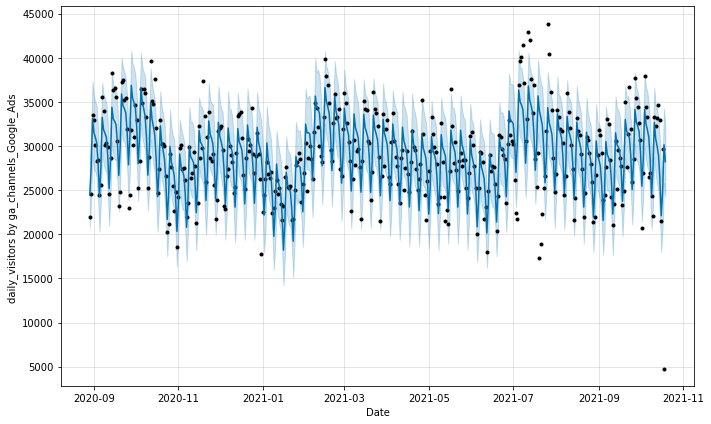

In [114]:
fig = plot_plotly(m, forecast)
py.iplot(fig) 

fig = m.plot(forecast,xlabel='Date',ylabel='daily_visitors by ga_channels_Google_Ads ')

In [115]:
#predicting for Organic Search#

In [116]:
finall=finalc["ga_channels_Organic_search_leads"]

In [117]:
prophet= finall
prophet
pr_data = prophet.reset_index()
pr_data.columns = ['ds','y']
pr_data

ds     y
0   2020-08-29  4938
1   2020-08-30  5878
2   2020-08-31  7915
3   2020-09-01  7588
4   2020-09-02  6998
..         ...   ...
411 2021-10-14  4393
412 2021-10-15  4175
413 2021-10-16  2598
414 2021-10-17  3384
415 2021-10-18   531

[416 rows x 2 columns]

In [118]:
m=Prophet(yearly_seasonality=True ,daily_seasonality=True)

In [119]:
m.fit(pr_data)

In [120]:
future=m.make_future_dataframe(periods=1)
forecast=m.predict(future)
forecast

ds        trend   yhat_lower   yhat_upper  trend_lower  \
0   2020-08-29  5103.996685  4826.380342  6390.303734  5103.996685   
1   2020-08-30  5095.513179  5270.656611  6869.721131  5095.513179   
2   2020-08-31  5087.029673  6409.342649  8006.448031  5087.029673   
3   2020-09-01  5078.546167  6108.281946  7642.395317  5078.546167   
4   2020-09-02  5070.062661  5931.002895  7498.771642  5070.062661   
..         ...          ...          ...          ...          ...   
412 2021-10-15  1608.792487  2234.071055  3910.384592  1608.792487   
413 2021-10-16  1600.308983  1483.576611  3049.537609  1600.308983   
414 2021-10-17  1591.825479  1914.944965  3503.465094  1591.825479   
415 2021-10-18  1583.341975  2950.291396  4545.916628  1583.341975   
416 2021-10-19  1574.858471  2587.412870  4228.786764  1574.858471   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    5103.996685      512.373681            512.373681            512.373681   
1    5095.513179      972.545642            972.545642            972.545642   
2    5087.029673     2105.559855           2105.559855           2105.559855   
3    5078.546167     1775.833602           1775.833602           1775.833602   
4    5070.062661     1625.008054           1625.008054           1625.008054   
..           ...             ...                   ...                   ...   
412  1608.792487     1437.346027           1437.346027           1437.346027   
413  1600.308983      655.376290            655.376290            655.376290   
414  1591.825479     1075.450768           1075.450768           1075.450768   
415  1583.341975     2171.114537           2171.114537           2171.114537   
416  1574.858471     1806.964851           1806.964851           1806.964851   

          daily  ...      weekly  weekly_lower  weekly_upper      yearly  \
0    672.781817  ... -914.414840   -914.414840   -914.414840  754.006704   
1    672.781817  ... -453.800691   -453.800691   -453.800691  753.564516   
2    672.781817  ...  682.683893    682.683893    682.683893  750.094145   
3    672.781817  ...  358.867216    358.867216    358.867216  744.184569   
4    672.781817  ...  215.772236    215.772236    215.772236  736.454001   
..          ...  ...         ...           ...           ...         ...   
412  672.781817  ... -171.971142   -171.971142   -171.971142  936.535352   
413  672.781817  ... -914.414840   -914.414840   -914.414840  897.009313   
414  672.781817  ... -453.800691   -453.800691   -453.800691  856.469641   
415  672.781817  ...  682.683893    682.683893    682.683893  815.648827   
416  672.781817  ...  358.867216    358.867216    358.867216  775.315817   

     yearly_lower  yearly_upper  multiplicative_terms  \
0      754.006704    754.006704                   0.0   
1      753.564516    753.564516                   0.0   
2      750.094145    750.094145                   0.0   
3      744.184569    744.184569                   0.0   
4      736.454001    736.454001                   0.0   
..            ...           ...                   ...   
412    936.535352    936.535352                   0.0   
413    897.009313    897.009313                   0.0   
414    856.469641    856.469641                   0.0   
415    815.648827    815.648827                   0.0   
416    775.315817    775.315817                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper         yhat  
0                           0.0                         0.0  5616.370367  
1                           0.0                         0.0  6068.058822  
2                           0.0                         0.0  7192.589528  
3                           0.0                         0.0  6854.379770  
4                           0.0                         0.0  6695.070716  
..                          ...                         ...          ...  
412                         0.0                         0.0  3046.138514  
413         

In [121]:
next_day_leads_Organic_search=forecast.yhat[416]

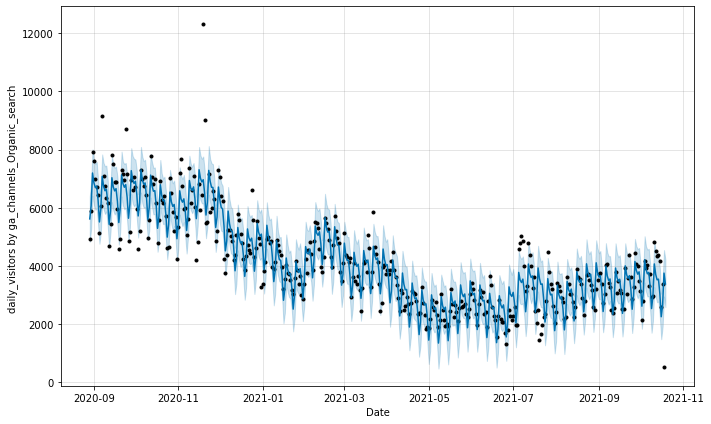

In [122]:
fig = plot_plotly(m, forecast)
py.iplot(fig) 

fig = m.plot(forecast,xlabel='Date',ylabel='daily_visitors by ga_channels_Organic_search ')

In [123]:
#predicting for REFERRAL#

In [124]:
finall=finalc["ga_channels_Referral_leads"]

In [125]:
prophet= finall
prophet
pr_data = prophet.reset_index()
pr_data.columns = ['ds','y']
pr_data

ds    y
0   2020-08-29  389
1   2020-08-30  505
2   2020-08-31  580
3   2020-09-01  614
4   2020-09-02  616
..         ...  ...
411 2021-10-14  105
412 2021-10-15   66
413 2021-10-16   62
414 2021-10-17   88
415 2021-10-18   15

[416 rows x 2 columns]

In [126]:
m=Prophet(yearly_seasonality=True ,daily_seasonality=True)

In [127]:
m.fit(pr_data)

In [128]:
future=m.make_future_dataframe(periods=1)
forecast=m.predict(future)
forecast

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2020-08-29  413.007430  414.792315  709.978092   413.007430   413.007430   
1   2020-08-30  411.849315  441.398491  720.857955   411.849315   411.849315   
2   2020-08-31  410.691201  465.696908  771.632268   410.691201   410.691201   
3   2020-09-01  409.533086  432.235629  714.133743   409.533086   409.533086   
4   2020-09-02  408.374971  381.161973  671.047178   408.374971   408.374971   
..         ...         ...         ...         ...          ...          ...   
412 2021-10-15  -70.729122 -159.387784  131.715107   -70.729122   -70.729122   
413 2021-10-16  -71.904318 -176.268385  115.377937   -71.904318   -71.904318   
414 2021-10-17  -73.079514 -162.970079  134.469313   -73.079514   -73.079514   
415 2021-10-18  -74.254710 -104.980649  184.710337   -74.254710   -74.254710   
416 2021-10-19  -75.429906 -148.986190  138.310427   -75.429906   -75.429906   

     additive_terms  additive_terms_lower  additive_terms_upper      daily  \
0        154.825813            154.825813            154.825813  96.648011   
1        163.369400            163.369400            163.369400  96.648011   
2        202.647942            202.647942            202.647942  96.648011   
3        154.552200            154.552200            154.552200  96.648011   
4        115.558382            115.558382            115.558382  96.648011   
..              ...                   ...                   ...        ...   
412       57.434968             57.434968             57.434968  96.648011   
413       43.437531             43.437531             43.437531  96.648011   
414       60.439978             60.439978             60.439978  96.648011   
415      108.613557            108.613557            108.613557  96.648011   
416       69.582735             69.582735             69.582735  96.648011   

     ...     weekly  weekly_lower  weekly_upper     yearly  yearly_lower  \
0    ... -28.100080    -28.100080    -28.100080  86.277881     86.277881   
1    ...  -3.814437     -3.814437     -3.814437  70.535826     70.535826   
2    ...  50.777225     50.777225     50.777225  55.222706     55.222706   
3    ...  17.260078     17.260078     17.260078  40.644110     40.644110   
4    ...  -8.172720     -8.172720     -8.172720  27.083091     27.083091   
..   ...        ...           ...           ...        ...           ...   
412  ... -22.187994    -22.187994    -22.187994 -17.025050    -17.025050   
413  ... -28.100080    -28.100080    -28.100080 -25.110400    -25.110400   
414  ...  -3.814437     -3.814437     -3.814437 -32.393596    -32.393596   
415  ...  50.777225     50.777225     50.777225 -38.811679    -38.811679   
416  ...  17.260078     17.260078     17.260078 -44.325354    -44.325354   

     yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0       86.277881                   0.0                         0.0   
1       70.535826                   0.0                         0.0   
2       55.222706                   0.0                         0.0   
3       40.644110                   0.0                         0.0   
4       27.083091                   0.0                         0.0   
..            ...                   ...                         ...   
412    -17.025050                   0.0                         0.0   
413    -25.110400                   0.0                         0.0   
414    -32.393596                   0.0                         0.0   
415    -38.811679                   0.0                         0.0   
416    -44.325354                   0.0                         0.0   

     multiplicative_terms_upper        yhat  
0                           0.0  567.833242  
1                           0.0  575.218715  
2                           0.0  613.339142  
3                           0.0  564.085286  
4                           0.0  523.933354  
..                          ...         ...  
412                       

In [129]:
next_day_leads_Referral=forecast.yhat[416]

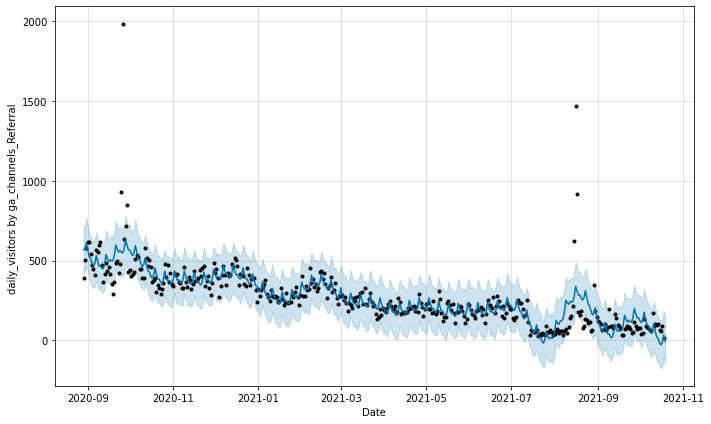

In [130]:
fig = plot_plotly(m, forecast)
py.iplot(fig) 

fig = m.plot(forecast,xlabel='Date',ylabel='daily_visitors by ga_channels_Referral ')

In [131]:
#ı put my result the conclusion part in the end of the project.

In [132]:
#### CASE 3####

In [133]:
# I want to improve my model by adding regressor to my time series.

In [134]:
#Firstly, ı want to look at my cleaned tansaction data.

In [135]:
final.head()

ga_channels_CRM_leads  ga_channels_Direct_leads  \
date                                                          
2020-08-29                   2420                       337   
2020-08-30                   2611                       376   
2020-08-31                   3282                       500   
2020-09-01                  20859                       501   
2020-09-02                  11520                       550   

            ga_channels_Facebook_leads  ga_channels_Google_Ads_leads  \
date                                                                   
2020-08-29                        2123                         21985   
2020-08-30                        2812                         24524   
2020-08-31                        2921                         33484   
2020-09-01                        2547                         32932   
2020-09-02                        3065                         30143   

            ga_channels_Organic_search_leads  ga_channels_Referral_leads  \
date                                                                       
2020-08-29                              4938                         389   
2020-08-30                              5878                         505   
2020-08-31                              7915                         580   
2020-09-01                              7588                         614   
2020-09-02                              6998                         616   

            ga_products_Product A  ga_products_Product B  \
date                                                       
2020-08-29                 4427.0                 2009.0   
2020-08-30                 4484.0                 2073.0   
2020-08-31                 5229.0                 3629.0   
2020-09-01                 6649.0                 3404.0   
2020-09-02                 6600.0                 3162.0   

            ga_products_Product C  ga_products_Product D  ...  hour_14  \
date                                                      ...            
2020-08-29                  476.0                24222.0  ...   1986.0   
2020-08-30                  513.0                28232.0  ...   2281.0   
2020-08-31                  660.0                37520.0  ...   3342.0   
2020-09-01                  698.0                52896.0  ...   5006.0   
2020-09-02                  462.0                41451.0  ...   3738.0   

            hour_15  hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  \
date                                                                        
2020-08-29   1854.0   1755.0   1710.0   1671.0   1528.0   1728.0   2437.0   
2020-08-30   2248.0   2204.0   2306.0   2084.0   1988.0   2133.0   3097.0   
2020-08-31   3280.0   3289.0   2972.0   2392.0   2182.0   2303.0   2697.0   
2020-09-01   3807.0   3366.0   2707.0   3882.0   2832.0   2878.0   3584.0   
2020-09-02   3046.0   2802.0   2726.0   2254.0   2168.0   2348.0   3564.0   

            hour_22  hour_23  
date                          
2020-08-29   2367.0   2013.0  
2020-08-30   3103.0   2532.0  
2020-08-31   2990.0   2385.0  
2020-09-01   3357.0   2701.0  
2020-09-02   3422.0   2519.0  

[5 rows x 36 columns]

In [136]:
#Then, I want to join live_digital campain data.

In [137]:
campaign=pd.read_csv("C:/Users/Asus/Desktop/live_digital_campaigns.csv")

In [138]:
campaign.head()

date  live_campaign
0  2020-08-29            126
1  2020-08-30            121
2  2020-08-31            130
3  2020-09-01            134
4  2020-09-02            133

In [139]:
campaign.isna().sum()

date             0
live_campaign    0
dtype: int64

In [140]:
finalm=final[final.columns[0:6]]

In [141]:
finalm.head()

ga_channels_CRM_leads  ga_channels_Direct_leads  \
date                                                          
2020-08-29                   2420                       337   
2020-08-30                   2611                       376   
2020-08-31                   3282                       500   
2020-09-01                  20859                       501   
2020-09-02                  11520                       550   

            ga_channels_Facebook_leads  ga_channels_Google_Ads_leads  \
date                                                                   
2020-08-29                        2123                         21985   
2020-08-30                        2812                         24524   
2020-08-31                        2921                         33484   
2020-09-01                        2547                         32932   
2020-09-02                        3065                         30143   

            ga_channels_Organic_search_leads  ga_channels_Referral_leads  
date                                                                      
2020-08-29                              4938                         389  
2020-08-30                              5878                         505  
2020-08-31                              7915                         580  
2020-09-01                              7588                         614  
2020-09-02                              6998                         616

In [142]:
#converting datetime

In [143]:
campaign["date"]=pd.to_datetime(campaign["date"])

In [144]:
campaign.set_index(campaign.date,inplace=True,drop=True)

In [145]:
campaign.drop("date",inplace=True,axis=1)

In [146]:
campaign.head()

live_campaign
date                     
2020-08-29            126
2020-08-30            121
2020-08-31            130
2020-09-01            134
2020-09-02            133

In [147]:
#lets join these two dataframes

In [148]:
yeni=finalm.join(campaign,on="date")

In [149]:
yeni.head()

ga_channels_CRM_leads  ga_channels_Direct_leads  \
date                                                          
2020-08-29                   2420                       337   
2020-08-30                   2611                       376   
2020-08-31                   3282                       500   
2020-09-01                  20859                       501   
2020-09-02                  11520                       550   

            ga_channels_Facebook_leads  ga_channels_Google_Ads_leads  \
date                                                                   
2020-08-29                        2123                         21985   
2020-08-30                        2812                         24524   
2020-08-31                        2921                         33484   
2020-09-01                        2547                         32932   
2020-09-02                        3065                         30143   

            ga_channels_Organic_search_leads  ga_channels_Referral_leads  \
date                                                                       
2020-08-29                              4938                         389   
2020-08-30                              5878                         505   
2020-08-31                              7915                         580   
2020-09-01                              7588                         614   
2020-09-02                              6998                         616   

            live_campaign  
date                       
2020-08-29            126  
2020-08-30            121  
2020-08-31            130  
2020-09-01            134  
2020-09-02            133

In [150]:
#checking missing values

In [151]:
yeni.isna().sum()

ga_channels_CRM_leads               0
ga_channels_Direct_leads            0
ga_channels_Facebook_leads          0
ga_channels_Google_Ads_leads        0
ga_channels_Organic_search_leads    0
ga_channels_Referral_leads          0
live_campaign                       0
dtype: int64

In [152]:
#PROPHET WİTH ADDING REGRESSOR TO İMPROVE THE FORECASTING MODEL##

In [153]:
#predicting for CRM WİTH ADDİNG REGRESSOR#

In [154]:
yeni_fin=yeni.copy()
yeni_fin.head(3)

ga_channels_CRM_leads  ga_channels_Direct_leads  \
date                                                          
2020-08-29                   2420                       337   
2020-08-30                   2611                       376   
2020-08-31                   3282                       500   

            ga_channels_Facebook_leads  ga_channels_Google_Ads_leads  \
date                                                                   
2020-08-29                        2123                         21985   
2020-08-30                        2812                         24524   
2020-08-31                        2921                         33484   

            ga_channels_Organic_search_leads  ga_channels_Referral_leads  \
date                                                                       
2020-08-29                              4938                         389   
2020-08-30                              5878                         505   
2020-08-31                              7915                         580   

            live_campaign  
date                       
2020-08-29            126  
2020-08-30            121  
2020-08-31            130

In [155]:
###ı could start by predicting add1 with univariate timeseries, and then predict y with add_regressor 
###and the predicted add1 as future values of the additional variables.

In [156]:
## 1. PREDICTING CAMPAİGN COLUMN FOR NEXT DAY, TO USE İT FOR NEXT ADDİNG-REGRESSOR TO İMPROVE FORECASTING.

In [157]:
finall=yeni_fin["live_campaign"]

In [158]:
prophet= finall
prophet
pr_data = prophet.reset_index()
pr_data.columns = ['ds','y']
pr_data

ds    y
0   2020-08-29  126
1   2020-08-30  121
2   2020-08-31  130
3   2020-09-01  134
4   2020-09-02  133
..         ...  ...
411 2021-10-14  134
412 2021-10-15  135
413 2021-10-16  121
414 2021-10-17  132
415 2021-10-18   97

[416 rows x 2 columns]

In [159]:
m=Prophet(yearly_seasonality=True ,daily_seasonality=True)


In [160]:
m.fit(pr_data)

In [161]:

future=m.make_future_dataframe(periods=1)
forecast=m.predict(future)
forecast


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2020-08-29   7.266836  112.210120  124.222538     7.266836     7.266836   
1   2020-08-30   7.199136  114.377266  126.566447     7.199136     7.199136   
2   2020-08-31   7.131436  116.759062  129.009808     7.131436     7.131436   
3   2020-09-01   7.063735  115.489957  128.040494     7.063735     7.063735   
4   2020-09-02   6.996035  114.447562  127.411992     6.996035     6.996035   
..         ...        ...         ...         ...          ...          ...   
412 2021-10-15  18.313214  119.750372  132.341761    18.313214    18.313214   
413 2021-10-16  18.532245  118.315695  130.462385    18.532245    18.532245   
414 2021-10-17  18.751275  120.649210  132.775548    18.751275    18.751275   
415 2021-10-18  18.970306  122.883679  135.908961    18.970306    18.970306   
416 2021-10-19  19.189336  122.232430  134.211649    19.189336    19.189336   

     additive_terms  additive_terms_lower  additive_terms_upper       daily  \
0        111.027784            111.027784            111.027784  116.474475   
1        113.081632            113.081632            113.081632  116.474475   
2        115.718683            115.718683            115.718683  116.474475   
3        114.694217            114.694217            114.694217  116.474475   
4        114.071140            114.071140            114.071140  116.474475   
..              ...                   ...                   ...         ...   
412      107.478039            107.478039            107.478039  116.474475   
413      105.774872            105.774872            105.774872  116.474475   
414      107.719970            107.719970            107.719970  116.474475   
415      110.265590            110.265590            110.265590  116.474475   
416      109.168399            109.168399            109.168399  116.474475   

     ...    weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
0    ... -2.665988     -2.665988     -2.665988 -2.780704     -2.780704   
1    ... -0.581190     -0.581190     -0.581190 -2.811653     -2.811653   
2    ...  2.070066      2.070066      2.070066 -2.825858     -2.825858   
3    ...  1.043704      1.043704      1.043704 -2.823963     -2.823963   
4    ...  0.403475      0.403475      0.403475 -2.806811     -2.806811   
..   ...       ...           ...           ...       ...           ...   
412  ... -1.135269     -1.135269     -1.135269 -7.861168     -7.861168   
413  ... -2.665988     -2.665988     -2.665988 -8.033615     -8.033615   
414  ... -0.581190     -0.581190     -0.581190 -8.173315     -8.173315   
415  ...  2.070066      2.070066      2.070066 -8.278951     -8.278951   
416  ...  1.043704      1.043704      1.043704 -8.349781     -8.349781   

     yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0       -2.780704                   0.0                         0.0   
1       -2.811653                   0.0                         0.0   
2       -2.825858                   0.0                         0.0   
3       -2.823963                   0.0                         0.0   
4       -2.806811                   0.0                         0.0   
..            ...                   ...                         ...   
412     -7.861168                   0.0                         0.0   
413     -8.033615                   0.0                         0.0   
414     -8.173315                   0.0                         0.0   
415     -8.278951                   0.0                         0.0   
416     -8.349781                   0.0                         0.0   

     multiplicative_terms_upper        yhat  
0                           0.0  118.294620  
1                           0.0  120.280768  
2                           0.0  122.850119  
3                           0.0  121.757952  
4                           0.0  121.067175  
..                          ...         ...  
412                         0.0  125.791253  
413 

In [162]:
next_day_live_campaign=128.358

In [163]:
finall=yeni_fin[["ga_channels_CRM_leads","live_campaign"]]

In [164]:
prophet= finall
prophet
pr_data = prophet.reset_index()
pr_data.columns = ['ds','y',"add1"]
pr_data

ds      y  add1
0   2020-08-29   2420   126
1   2020-08-30   2611   121
2   2020-08-31   3282   130
3   2020-09-01  20859   134
4   2020-09-02  11520   133
..         ...    ...   ...
411 2021-10-14   2848   134
412 2021-10-15   3953   135
413 2021-10-16   1318   121
414 2021-10-17   1953   132
415 2021-10-18    185    97

[416 rows x 3 columns]

In [165]:
df2 = {'ds':"2021-10-19",'y':np.nan, 'add1': next_day_live_campaign}

In [166]:
df2

{'ds': '2021-10-19', 'y': nan, 'add1': 128.358}

In [167]:
pr_data=pr_data.append(df2,ignore_index=True)

In [168]:
pr_data.tail()

ds       y     add1
412  2021-10-15 00:00:00  3953.0  135.000
413  2021-10-16 00:00:00  1318.0  121.000
414  2021-10-17 00:00:00  1953.0  132.000
415  2021-10-18 00:00:00   185.0   97.000
416           2021-10-19     NaN  128.358

In [169]:
pr_data["ds"]=pd.to_datetime(pr_data["ds"])

In [170]:
pr_data.tail()

ds       y     add1
412 2021-10-15  3953.0  135.000
413 2021-10-16  1318.0  121.000
414 2021-10-17  1953.0  132.000
415 2021-10-18   185.0   97.000
416 2021-10-19     NaN  128.358

In [171]:
#NoW I HAVE NEW REGRESSOR FOR PREDICTION WHİCH İS next_day_live_campaign

In [172]:
# Lets reforcasting CRM CHANNEL with adding new regressor.

In [173]:
m=Prophet(yearly_seasonality=True ,daily_seasonality=True)
m.add_regressor('add1')

In [174]:
m.fit(pr_data[0:416])

In [175]:
new=pr_data[416:417]
new


ds   y     add1
416 2021-10-19 NaN  128.358

In [176]:
forecast=m.predict(new.drop(columns="y"))
forecast

ds        trend   yhat_lower    yhat_upper  trend_lower  \
0 2021-10-19 -2664.045053  2881.069814  11010.165673 -2664.045053   

   trend_upper         add1   add1_lower   add1_upper  additive_terms  ...  \
0 -2664.045053  1546.143439  1546.143439  1546.143439     9708.838345  ...   

        weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
0  2148.294066   2148.294066   2148.294066 -86.27503     -86.27503   

   yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0     -86.27503                   0.0                         0.0   

   multiplicative_terms_upper         yhat  
0                         0.0  7044.793293  

[1 rows x 28 columns]

In [177]:
improved_next_day_leads_CRM=7044.793

In [178]:
# Lets reforcasting FACEBOOK CHANNEL with adding new regressor.

In [179]:
finall=yeni_fin[["ga_channels_Facebook_leads","live_campaign"]]

In [180]:
prophet= finall
prophet
pr_data = prophet.reset_index()
pr_data.columns = ['ds','y',"add1"]
pr_data



ds     y  add1
0   2020-08-29  2123   126
1   2020-08-30  2812   121
2   2020-08-31  2921   130
3   2020-09-01  2547   134
4   2020-09-02  3065   133
..         ...   ...   ...
411 2021-10-14  4930   134
412 2021-10-15  4327   135
413 2021-10-16  4291   121
414 2021-10-17  6520   132
415 2021-10-18  1096    97

[416 rows x 3 columns]

In [181]:
pr_data=pr_data.append(df2,ignore_index=True)

In [182]:
pr_data.tail()

ds       y     add1
412  2021-10-15 00:00:00  4327.0  135.000
413  2021-10-16 00:00:00  4291.0  121.000
414  2021-10-17 00:00:00  6520.0  132.000
415  2021-10-18 00:00:00  1096.0   97.000
416           2021-10-19     NaN  128.358

In [183]:
pr_data["ds"]=pd.to_datetime(pr_data["ds"])

In [184]:
pr_data.tail()

ds       y     add1
412 2021-10-15  4327.0  135.000
413 2021-10-16  4291.0  121.000
414 2021-10-17  6520.0  132.000
415 2021-10-18  1096.0   97.000
416 2021-10-19     NaN  128.358

In [185]:
m=Prophet(yearly_seasonality=True ,daily_seasonality=True)
m.add_regressor('add1')

In [186]:
m.fit(pr_data[0:416])

In [187]:
new=pr_data[416:417]
new

ds   y     add1
416 2021-10-19 NaN  128.358

In [188]:
forecast=m.predict(new.drop(columns="y"))
forecast

ds        trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2021-10-19  3805.889958  2197.449664  5867.134378  3805.889958  3805.889958   

         add1  add1_lower  add1_upper  additive_terms  ...      weekly  \
0  609.369152  609.369152  609.369152      328.997117  ... -259.963848   

   weekly_lower  weekly_upper       yearly  yearly_lower  yearly_upper  \
0   -259.963848   -259.963848 -1675.005809  -1675.005809  -1675.005809   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   

   multiplicative_terms_upper         yhat  
0                         0.0  4134.887075  

[1 rows x 28 columns]

In [189]:
improved_next_day_leads_Facebook=4134.8870

In [190]:
# Lets reforcasting DIRECT CHANNEL with adding new regressor.

In [191]:
finall=yeni_fin[["ga_channels_Direct_leads","live_campaign"]]

In [192]:
prophet= finall
prophet
pr_data = prophet.reset_index()
pr_data.columns = ['ds','y',"add1"]
pr_data

pr_data=pr_data.append(df2,ignore_index=True)

pr_data["ds"]=pd.to_datetime(pr_data["ds"])

m=Prophet(yearly_seasonality=True ,daily_seasonality=True)
m.add_regressor('add1')
m.fit(pr_data[0:416])

new=pr_data[416:417]
new

forecast=m.predict(new.drop(columns="y"))
forecast

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2021-10-19  577.687619  503.797189  866.740367   577.687619   577.687619   

         add1  add1_lower  add1_upper  additive_terms  ...    weekly  \
0  145.170204  145.170204  145.170204      109.151031  ...  2.412646   

   weekly_lower  weekly_upper      yearly  yearly_lower  yearly_upper  \
0      2.412646      2.412646 -147.656205   -147.656205   -147.656205   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   

   multiplicative_terms_upper       yhat  
0                         0.0  686.83865  

[1 rows x 28 columns]

In [193]:
improved_next_day_leads_Direct=686.838

In [194]:
# Lets reforcasting GOOGLE ADS CHANNEL with adding new regressor.

In [195]:
finall=yeni_fin[["ga_channels_Google_Ads_leads","live_campaign"]]

In [196]:
prophet= finall
prophet
pr_data = prophet.reset_index()
pr_data.columns = ['ds','y',"add1"]
pr_data

pr_data=pr_data.append(df2,ignore_index=True)

pr_data["ds"]=pd.to_datetime(pr_data["ds"])

m=Prophet(yearly_seasonality=True ,daily_seasonality=True)
m.add_regressor('add1')
m.fit(pr_data[0:416])

new=pr_data[416:417]
new

forecast=m.predict(new.drop(columns="y"))
forecast

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 2021-10-19  18286.583514  26441.185334  33431.836422  18286.583514   

    trend_upper         add1   add1_lower   add1_upper  additive_terms  ...  \
0  18286.583514  3629.331593  3629.331593  3629.331593    11568.302242  ...   

        weekly  weekly_lower  weekly_upper       yearly  yearly_lower  \
0  1838.558078   1838.558078   1838.558078 -1789.752527  -1789.752527   

   yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0  -1789.752527                   0.0                         0.0   

   multiplicative_terms_upper          yhat  
0                         0.0  29854.885757  

[1 rows x 28 columns]

In [197]:
improved_next_day_leads_Google_Ads=29854.886

In [198]:
# Lets reforcasting ORGANIC SEARCH CHANNEL with adding new regressor.

In [199]:
finall=yeni_fin[["ga_channels_Organic_search_leads","live_campaign"]]

In [200]:
prophet= finall
prophet
pr_data = prophet.reset_index()
pr_data.columns = ['ds','y',"add1"]
pr_data

pr_data=pr_data.append(df2,ignore_index=True)

pr_data["ds"]=pd.to_datetime(pr_data["ds"])

m=Prophet(yearly_seasonality=True ,daily_seasonality=True)
m.add_regressor('add1')
m.fit(pr_data[0:416])

new=pr_data[416:417]
new

forecast=m.predict(new.drop(columns="y"))
forecast

ds        trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2021-10-19  1182.767251  2948.46998  4409.55457  1182.767251  1182.767251   

         add1  add1_lower  add1_upper  additive_terms  ...      weekly  \
0  600.854614  600.854614  600.854614     2465.919635  ...  309.768425   

   weekly_lower  weekly_upper      yearly  yearly_lower  yearly_upper  \
0    309.768425    309.768425  672.327547    672.327547    672.327547   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   

   multiplicative_terms_upper         yhat  
0                         0.0  3648.686887  

[1 rows x 28 columns]

In [201]:
improved_next_day_leads_Organic_search=3648.6869

In [202]:
# Lets reforcasting REFERRAL CHANNEL with adding new regressor.

In [203]:
finall=yeni_fin[["ga_channels_Referral_leads","live_campaign"]]

In [204]:
prophet= finall
prophet
pr_data = prophet.reset_index()
pr_data.columns = ['ds','y',"add1"]
pr_data

pr_data=pr_data.append(df2,ignore_index=True)

pr_data["ds"]=pd.to_datetime(pr_data["ds"])

m=Prophet(yearly_seasonality=True ,daily_seasonality=True)
m.add_regressor('add1')
m.fit(pr_data[0:416])

new=pr_data[416:417]
new

forecast=m.predict(new.drop(columns="y"))
forecast

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2021-10-19 -78.022993 -151.364007  149.988798   -78.022993   -78.022993   

       add1  add1_lower  add1_upper  additive_terms  ...     weekly  \
0  4.440999    4.440999    4.440999       74.594713  ...  16.907344   

   weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper  \
0     16.907344     16.907344 -44.788504    -44.788504    -44.788504   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   

   multiplicative_terms_upper     yhat  
0                         0.0 -3.42828  

[1 rows x 28 columns]

In [205]:
improved_next_day_leads_Referral=-3.42828

In [206]:
##### CONCLUSION####

In [207]:
print("2021-10-19:","CRM:",next_day_leads_CRM,"improved CRM:",improved_next_day_leads_CRM)
print("2021-10-19:","Direct:",next_day_leads_Direct,"improved Direct:",improved_next_day_leads_Direct)
print("2021-10-19:","Facebook:",next_day_leads_Facebook,"improved Facebook:",improved_next_day_leads_Facebook)
print("2021-10-19:","Organic_search:",next_day_leads_Organic_search,"improved Organic_search:",improved_next_day_leads_Organic_search)
print("2021-10-19:","Google_Ads:",next_day_leads_Google_Ads,"improved Google_Ads:",improved_next_day_leads_Google_Ads)
print("2021-10-19:","Referral:",next_day_leads_Referral,"improved Referral:",improved_next_day_leads_Referral)

2021-10-19: CRM: 6374.7189182988095 improved CRM: 7044.793
2021-10-19: Direct: 621.4077167676692 improved Direct: 686.838
2021-10-19: Facebook: 3900.5760127279805 improved Facebook: 4134.887
2021-10-19: Organic_search: 3381.8233220132606 improved Organic_search: 3648.6869
2021-10-19: Google_Ads: 28218.688810038686 improved Google_Ads: 29854.886
2021-10-19: Referral: -5.847170532370924 improved Referral: -3.42828
